In [1]:
# 단계 1: 폰트 설치
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [1]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import pandas as pd
from datetime import datetime as dt

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

In [45]:
# 데이터 불러오기
df = pd.read_pickle('/content/서울시.pkl')
print(df.head())
df.dtypes

   침수면적(1,000㎡)  총강수량(mm)  기간(일)  평균기온(℃)  최다강수1H  최대풍속(m/s)         일자  행정구역
0           0.4      75.0      3     24.8    20.5        5.0 2012-07-18  서대문구
1           0.4     113.5      3     24.7    51.5        4.2 2005-07-28  서대문구
2           0.4     274.5     10     22.9    21.5        4.2 2011-07-12  서대문구
3           0.9     187.0      2     21.6    46.0        4.1 2012-07-06  서대문구
4           0.9     195.5      4     23.7    30.0        4.1 2003-07-24  서대문구


,0
"침수면적(1,000㎡)",float64
총강수량(mm),float64
기간(일),int64
평균기온(℃),float64
최다강수1H,float64
최대풍속(m/s),float64
일자,datetime64[ns]
행정구역,object


# 전처리2
- 각기 다른 행정구역의 면적을 침수면적을 통해 비교할 경우, 정확하지 않은 분석이 될 수 있으므로, 해당 구역의 면적 조사.
  + https://data.seoul.go.kr/dataList/10112/S/2/datasetView.do
- 또한 folium 라이브러리를 이용하여 지도에 침수 발생 횟수 시각화

In [46]:
soul = { # 구: 면적(km^2), [구청위도, 구청경도]
    '서울시': [605.25, [37.566755, 126.978139]],
    '강남구': [39.51, [37.517711, 127.047450]],
    '강동구': [24.59, [37.530335, 127.123802]],
    '강북구': [23.6, [37.639930, 127.025540]],
    '강서구': [41.45, [37.551097, 126.849617]],
    '관악구': [29.57, [37.478431, 126.951617]],
    '광진구': [17.06, [37.544831, 127.089742]],
    '구로구': [20.12, [37.495649, 126.887650]],
    '금천구': [13.02, [37.462941, 126.900995]],
    '노원구': [35.44, [37.654197, 127.056701]],
    '도봉구': [20.65, [37.668952, 127.047092]],
    '동대문구': [14.22, [37.574380, 127.039833]],
    '동작구': [16.35, [37.501398, 126.951158]],
    '마포구': [23.85, [37.566412, 126.902007]],
    '서대문구': [17.63, [37.579473, 126.936495]],
    '서초구': [46.97, [37.483689, 127.032785]],
    '성동구': [16.86, [37.563554, 127.036956]],
    '성북구': [24.57, [37.589553, 127.016743]],
    '송파구': [33.88, [37.514666, 127.105915]],
    '양천구': [17.41, [37.517121, 126.866586]],
    '영등포구': [24.55, [37.526441, 126.895942]],
    '용산구': [21.87, [37.532471, 126.990703]],
    '은평구': [29.71, [37.602894, 126.929288]],
    '종로구': [605.25, [37.573630, 126.978930]],
    '중구': [9.96, [37.563963, 126.997627]],
    '중랑구': [18.5, [37.606500, 127.093206]]
}

In [47]:
df['면적'] = df['행정구역'].apply(lambda x: soul[x][0]) * 1_000_000
df['위도'] = df['행정구역'].apply(lambda x: soul[x][1][0])
df['경도'] = df['행정구역'].apply(lambda x: soul[x][1][1])
df['침수면적비율(%)'] = round((df['침수면적(1,000㎡)'] / df['면적'] * 100), 6)
print(df.head())
df.dtypes

   침수면적(1,000㎡)  총강수량(mm)  기간(일)  평균기온(℃)  최다강수1H  최대풍속(m/s)         일자  행정구역  \
0           0.4      75.0      3     24.8    20.5        5.0 2012-07-18  서대문구   
1           0.4     113.5      3     24.7    51.5        4.2 2005-07-28  서대문구   
2           0.4     274.5     10     22.9    21.5        4.2 2011-07-12  서대문구   
3           0.9     187.0      2     21.6    46.0        4.1 2012-07-06  서대문구   
4           0.9     195.5      4     23.7    30.0        4.1 2003-07-24  서대문구   

           면적         위도          경도  침수면적비율(%)  
0  17630000.0  37.579473  126.936495   0.000002  
1  17630000.0  37.579473  126.936495   0.000002  
2  17630000.0  37.579473  126.936495   0.000002  
3  17630000.0  37.579473  126.936495   0.000005  
4  17630000.0  37.579473  126.936495   0.000005  


,0
"침수면적(1,000㎡)",float64
총강수량(mm),float64
기간(일),int64
평균기온(℃),float64
최다강수1H,float64
최대풍속(m/s),float64
일자,datetime64[ns]
행정구역,object
면적,float64
위도,float64


In [48]:
import folium
import pandas as pd

# df: 기존 너의 데이터프레임

# -----------------------------------------
# 1. 행정구역별 침수 발생 횟수 계산
# -----------------------------------------
count_df = df.groupby("행정구역").size().reset_index(name="침수발생횟수")

# 좌표 & 면적 컬럼이 들어 있으므로 그룹된 DF에 추가
count_df = count_df.merge(df[['행정구역', '위도', '경도']].drop_duplicates(), on='행정구역', how='left')

# -----------------------------------------
# 2. folium 지도 생성 (서울 중심)
# -----------------------------------------
center_lat, center_lng = soul['서울시'][1]

m = folium.Map(location=[center_lat, center_lng], zoom_start=10)

# -----------------------------------------
# 3. 침수 횟수 기반 반경 계산
# -----------------------------------------
for _, row in count_df.iterrows():
    행정구역 = row['행정구역']
    lat = row['위도']
    lng = row['경도']
    cnt = row['침수발생횟수']

    # 원의 반경 (침수 횟수 × 200m)
    radius = cnt * 200

    folium.Circle(
        location=[lat, lng],
        radius=radius,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.4,
        popup=f"{행정구역} - 침수 {cnt}회"
    ).add_to(m)

# -----------------------------------------
# 4. 결과 저장
# -----------------------------------------
m.save("seoul_flood_map.html")

print("완료! → seoul_flood_map.html 로 저장됨")
m

완료! → seoul_flood_map.html 로 저장됨


# 상관관계
각각의 행정구역을 원핫인코딩을 진행하기에는 행정구역이 25개나 되므로, 서울시 상관관계 분석에서는 행정구역을 제외하고 처리.

In [49]:
df.drop(columns=['침수면적(1,000㎡)', '위도', '경도'], inplace=True)
df_corr = df.drop(columns=['행정구역'])
df_corr.head()

,총강수량(mm),기간(일),평균기온(℃),최다강수1H,최대풍속(m/s),일자,면적,침수면적비율(%)
0,75.0,3,24.8,20.5,5.0,2012-07-18,17630000.0,0.000002
1,113.5,3,24.7,51.5,4.2,2005-07-28,17630000.0,0.000002
2,274.5,10,22.9,21.5,4.2,2011-07-12,17630000.0,0.000002
3,187.0,2,21.6,46.0,4.1,2012-07-06,17630000.0,0.000005
4,195.5,4,23.7,30.0,4.1,2003-07-24,17630000.0,0.000005


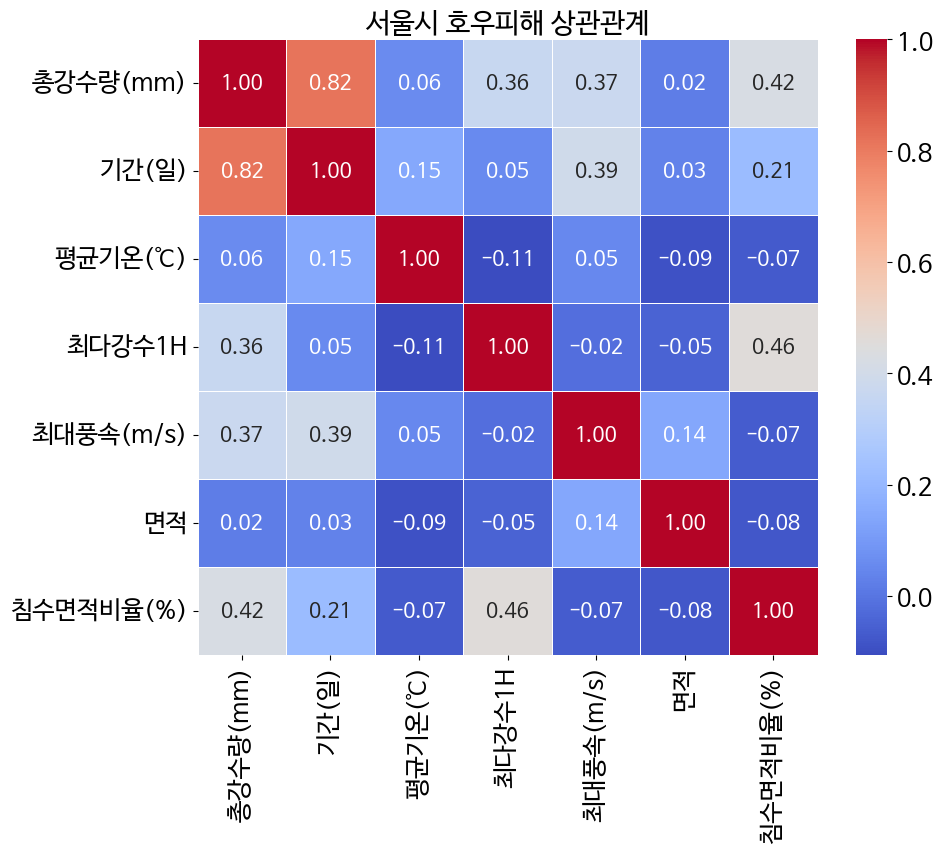

In [50]:
# 1. 상관계수 행렬 계산
correlation_matrix = df_corr.corr(numeric_only=True)

# 3. 히트맵 생성
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=.5,
    cbar=True,
    annot_kws={"fontsize": 15}
)

plt.title('서울시 호우피해 상관관계', fontsize=20)
plt.show()

# 상관관계 분석
- 기존보다 총강수량과 강우기간의 상관관계가 눈에 띌 정도로 줄었다.
  + 이는 각 행정구역간의 침수대비전략의 차이로 인해, 각각의 행정구역을 서울시 하나로 묶어서 상관관계를 분석하였을 때, 일관성이 다소 떨어진다고 판단된다.

# 시각화 진행

In [51]:
print(df['침수면적비율(%)'].describe())

count    323.000000
mean       0.000615
std        0.001722
min        0.000000
25%        0.000008
50%        0.000037
75%        0.000254
max        0.016735
Name: 침수면적비율(%), dtype: float64


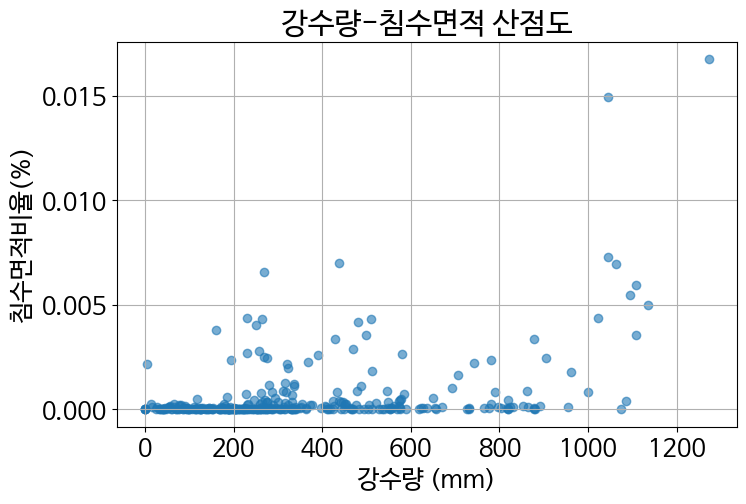

In [52]:
# 1. 강수량 vs 침수피해 시각화
# 1-1. Scatter Plot — 강수량 vs 침수피해 규모
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(df['총강수량(mm)'], df['침수면적비율(%)'], alpha=0.6)
plt.xlabel("강수량 (mm)")
plt.ylabel("침수면적비율(%)")
plt.title("강수량-침수면적 산점도")
plt.grid(True)
plt.show()

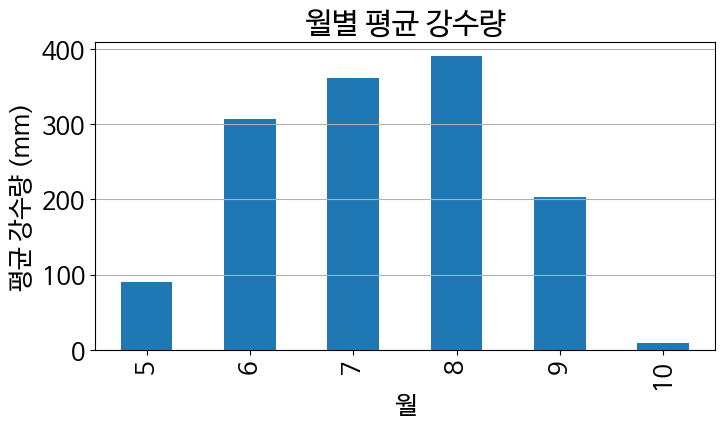

In [53]:
df['month'] = df['일자'].dt.month
monthly_rain = df.groupby('month')['총강수량(mm)'].mean()

plt.figure(figsize=(8, 4))
monthly_rain.plot(kind='bar')
plt.xlabel("월")
plt.ylabel("평균 강수량 (mm)")
plt.title("월별 평균 강수량")
plt.grid(True, axis='y')
plt.show()

In [54]:
df.to_pickle('서울시2.pkl')